In [ ]:
from scripts.VTECDataReader import VTECDataReader

import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

rcParams.update({
    "text.usetex": True,
    "font.size": 16
})

In [2]:
PTEX_dir = ["/home/federico/Documents/FCFM/Proyecto TIDs/Data/CMN Files/PTEX/2018",
            "/home/federico/Documents/FCFM/Proyecto TIDs/Data/CMN Files/PTEX/2019"]

VTECReader = VTECDataReader(PTEX_dir, min_amplitude = 0.0, window_size = 240)
VTECReader.read_and_extract_vtec_data()

--Reading Cmn files--
Number of files: 727


100%|██████████| 727/727 [00:32<00:00, 22.27it/s]



--Separate each Cmn file by PRN--


100%|██████████| 727/727 [00:15<00:00, 46.81it/s]



--Detrend time series by PRN--


100%|██████████| 31/31 [01:24<00:00,  2.71s/it]


In [111]:
features_dTEC = {"min":[], "max":[], "std":[], "iqr":[]}

for k, vtec_series in enumerate(VTECReader.dtec_sequences):
    features_dTEC["min"].append( abs(vtec_series.min()) )
    features_dTEC["max"].append( vtec_series.max() )
    features_dTEC["std"].append( vtec_series.std())
    features_dTEC["iqr"].append( np.percentile(vtec_series, 75) - np.percentile(vtec_series, 25))

sorted_min_dTEC_values = np.array(sorted(features_dTEC["min"]))
sorted_max_dTEC_values = np.array(sorted(features_dTEC["max"]))

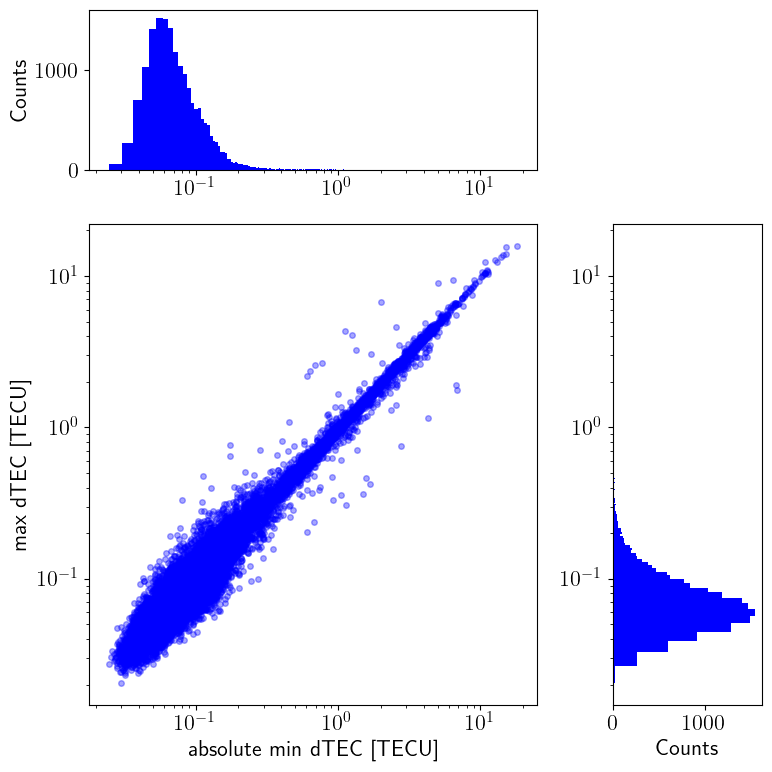

In [112]:
FigureScatter, SubplotsScatter = plt.subplot_mosaic([["HistMin", "."], ["Scatter", "HistMax"]], width_ratios = [3, 1], height_ratios = [1, 3], figsize = (8, 8))

SubplotsScatter["Scatter"].scatter(features_dTEC["min"], features_dTEC["max"], s = 16, marker = 'o', fc = "blue", alpha = 0.35)
SubplotsScatter["Scatter"].set_xscale("log")
SubplotsScatter["Scatter"].set_yscale("log")
SubplotsScatter["Scatter"].set_xlabel("absolute min dTEC [TECU]")
SubplotsScatter["Scatter"].set_ylabel("max dTEC [TECU]")

SubplotsScatter["HistMin"].hist(features_dTEC["min"], bins = "auto", orientation = "vertical", color = "blue")
SubplotsScatter["HistMin"].set_ylabel("Counts")
SubplotsScatter["HistMin"].set_xscale("log")
SubplotsScatter["HistMax"].hist(features_dTEC["max"], bins = "auto", orientation = "horizontal", color = "blue")
SubplotsScatter["HistMax"].set_xlabel("Counts")
SubplotsScatter["HistMax"].set_yscale("log")

FigureScatter.tight_layout()

plt.show()

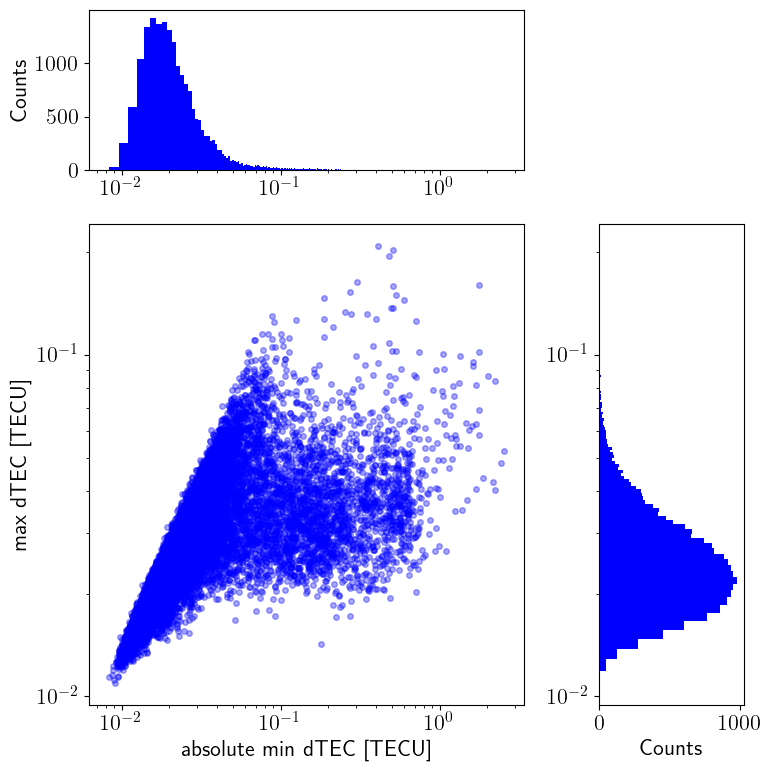

In [114]:
FigureScatter, SubplotsScatter = plt.subplot_mosaic([["HistSTD", "."], ["Scatter", "HistIQR"]], width_ratios = [3, 1], height_ratios = [1, 3], figsize = (8, 8))

SubplotsScatter["Scatter"].scatter(features_dTEC["std"], features_dTEC["iqr"], s = 16, marker = 'o', fc = "blue", alpha = 0.35)
SubplotsScatter["Scatter"].set_xscale("log")
SubplotsScatter["Scatter"].set_yscale("log")
SubplotsScatter["Scatter"].set_xlabel("absolute min dTEC [TECU]")
SubplotsScatter["Scatter"].set_ylabel("max dTEC [TECU]")

SubplotsScatter["HistSTD"].hist(features_dTEC["std"], bins = "auto", orientation = "vertical", color = "blue")
SubplotsScatter["HistSTD"].set_ylabel("Counts")
SubplotsScatter["HistSTD"].set_xscale("log")
SubplotsScatter["HistIQR"].hist(features_dTEC["iqr"], bins = "auto", orientation = "horizontal", color = "blue")
SubplotsScatter["HistIQR"].set_xlabel("Counts")
SubplotsScatter["HistIQR"].set_yscale("log")

FigureScatter.tight_layout()

plt.show()

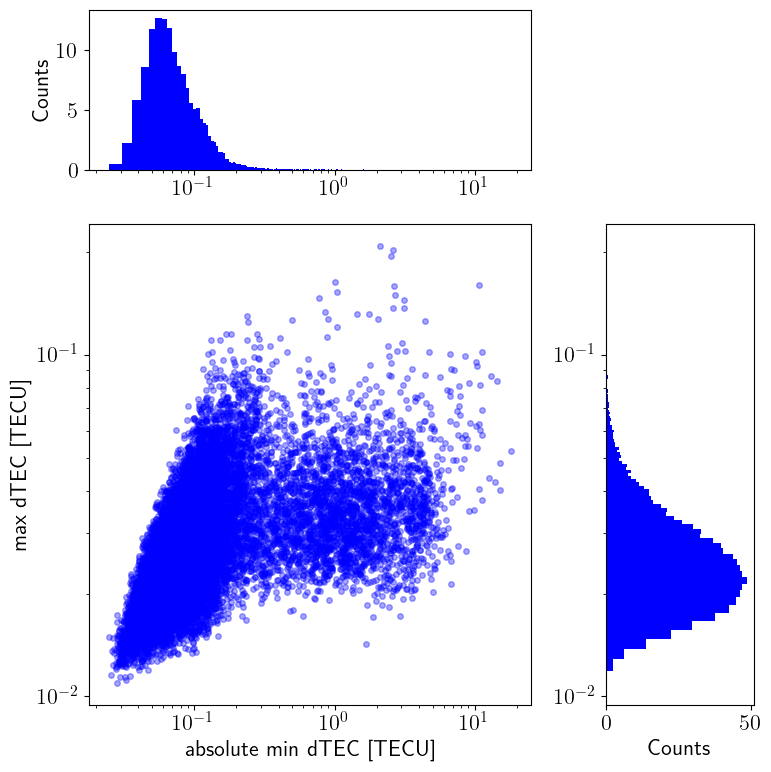

In [120]:
FigureScatter, SubplotsScatter = plt.subplot_mosaic([["HistMin", "."], ["Scatter", "HistIQR"]], width_ratios = [3, 1], height_ratios = [1, 3], figsize = (8, 8))

SubplotsScatter["Scatter"].scatter(features_dTEC["min"], features_dTEC["iqr"], s = 16, marker = 'o', fc = "blue", alpha = 0.35)
SubplotsScatter["Scatter"].set_xscale("log")
SubplotsScatter["Scatter"].set_yscale("log")
SubplotsScatter["Scatter"].set_xlabel("absolute min dTEC [TECU]")
SubplotsScatter["Scatter"].set_ylabel("max dTEC [TECU]")

SubplotsScatter["HistMin"].hist(features_dTEC["min"], bins = "auto", orientation = "vertical", color = "blue", density = True)
SubplotsScatter["HistMin"].set_ylabel("Counts")
SubplotsScatter["HistMin"].set_xscale("log")
SubplotsScatter["HistIQR"].hist(features_dTEC["iqr"], bins = "auto", orientation = "horizontal", color = "blue", density = True)
SubplotsScatter["HistIQR"].set_xlabel("Counts")
SubplotsScatter["HistIQR"].set_yscale("log")

FigureScatter.tight_layout()

plt.show()

In [116]:
N = sorted_min_dTEC_values.size

sum_indicator = np.array([ (n + 1)/N for n in range(N)])

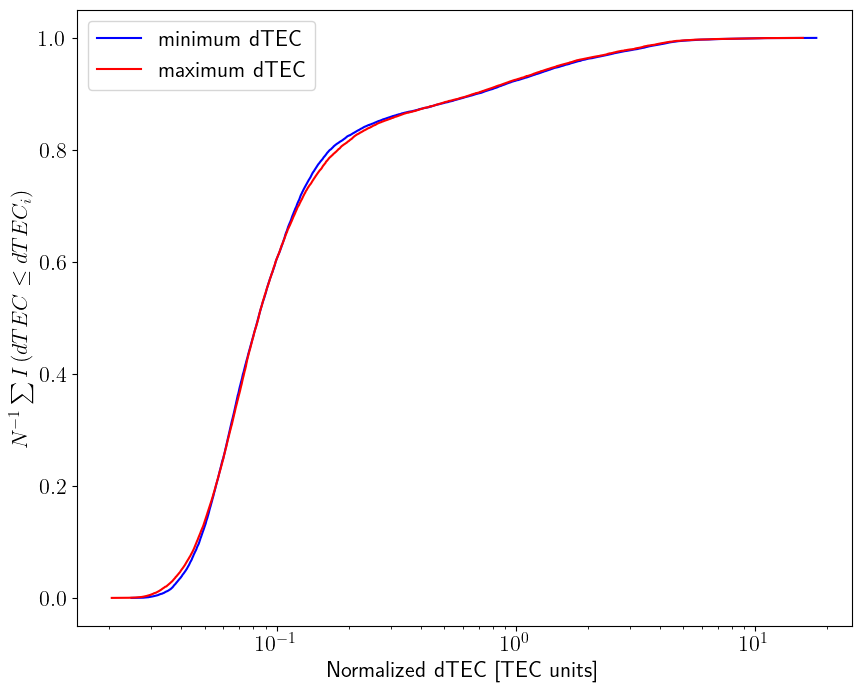

In [117]:
Figure, Subplots = plt.subplots(ncols = 1, nrows = 1, figsize = (10, 8))

Subplots.plot(sorted_min_dTEC_values, sum_indicator, label = "minimum dTEC", color = "blue", zorder = 1)
Subplots.plot(sorted_max_dTEC_values, sum_indicator, label = "maximum dTEC", color = "red", zorder = 1)

Subplots.set_xlabel("Normalized dTEC [TEC units]")
Subplots.set_ylabel(r"$N^{-1}\sum I\left(dTEC \leq dTEC_{i}\right)$")
Subplots.set_xscale("log")
Subplots.legend()

plt.show()

In [ ]:
def closest_point_to_01(x, y):
    distances = np.sqrt( x**2 + (y - 1)**2)
    idx_min = np.argmin(distances)
    return x[idx_min], y[idx_min], distances[idx_min], distances

In [122]:
x_close_min, y_close_min, min_tec_min_dist, min_distances = closest_point_to_01(sorted_min_dTEC_values, sum_indicator)
x_close_max, y_close_max, max_tec_min_dist, max_distances = closest_point_to_01(sorted_max_dTEC_values, sum_indicator)

In [129]:
print(f"Minimum dTEC closest point to (0, 1): ({x_close_min:.5f}, {y_close_min:0.5f})")
print(f"Maximum dTEC closest point to (0, 1): ({x_close_max:.5f}, {y_close_max:0.5f})")

Minimum dTEC closest point to (0, 1): (0.17334, 0.80648)
Maximum dTEC closest point to (0, 1): (0.18656, 0.80615)


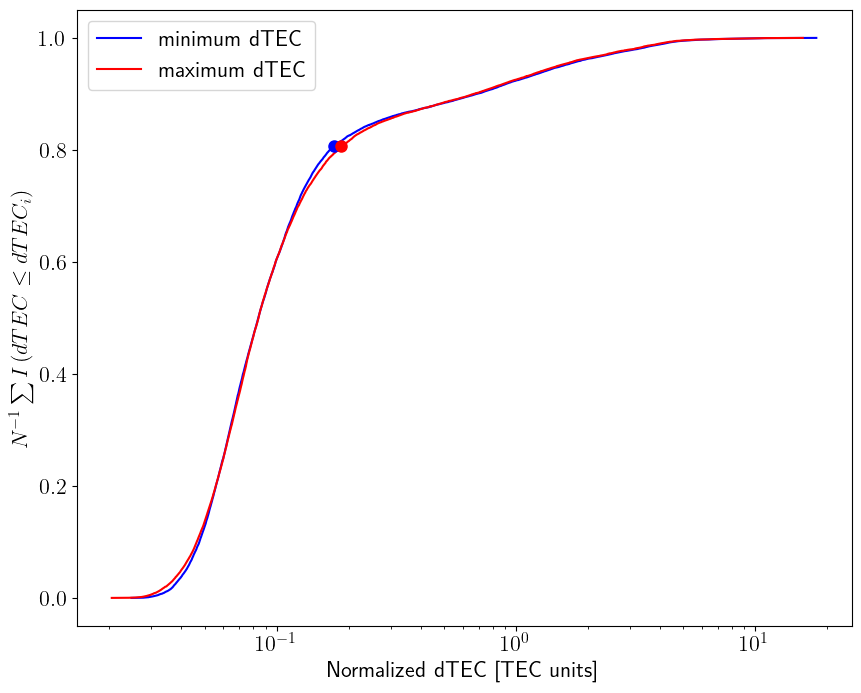

In [124]:
Figure, Subplots = plt.subplots(ncols = 1, nrows = 1, figsize = (10, 8))

Subplots.plot(sorted_min_dTEC_values, sum_indicator, label = "minimum dTEC", color = "blue", zorder = 0)
Subplots.plot(sorted_max_dTEC_values, sum_indicator, label = "maximum dTEC", color = "red", zorder = 0)
Subplots.scatter(x_close_min, y_close_min, s = 64, marker = "o", color = "blue")
Subplots.scatter(x_close_max, y_close_max, s = 64, marker = "o", color = "red")

Subplots.set_xlabel("Normalized dTEC [TEC units]")
Subplots.set_ylabel(r"$N^{-1}\sum I\left(dTEC \leq dTEC_{i}\right)$")
Subplots.set_xscale("log")
Subplots.legend()

plt.show()